In [4]:
import pandas as pd
import re
import numpy as np
from DAL_Class_1 import DAL
import processing_functions
from datetime import datetime
from site_information_class import SiteDataProcessor
import tkinter as tk
from tkinter import simpledialog, scrolledtext 
from tkinter import ttk
from PIL import Image, ImageTk
from tkinter import messagebox
import math
import os
from Class_tkinter import SiteInformationApp  

Runs the downloader window

In [5]:
if __name__ == "__main__":
    root = tk.Tk()
    app = SiteInformationApp(root)
    root.mainloop()
    # Access the DataFrame after the main loop
    df_spill_hours = app.df_spill_hours
    df_rainfall_raw = app.df_rainfall_global
    df_raw_sump = app.df_raw_sump_global
    df_hour_agg_flow_meter_raw = app.df_hour_agg_flow_meter_global
    #df_raw_flow_meter = app.df_raw_flow_meter_global
    start_date_downloaded = app.start_date_global
    end_date_downloaded = app.end_date_global
    site_id_selected = app.site_id


Established Connection
Closed Connection
Selected DB Addr: E11943
Selected Source: Waste
Selected DB Addr: E11726
Selected Source: Waste
Established Connection
Closed Connection
Established Connection
Closed Connection
Established Connection
Closed Connection
Head of df_rainfall:
    ReadingDate  Easting  Northing Intensity(mm/hr) Depth(mm)  Year Month Day
0  202301012045   336500    160500             0.00      0.03  2023    01  01
1  202301012040   336500    160500             0.01      0.06  2023    01  01
2  202301012035   336500    160500             0.01      0.06  2023    01  01
3  202301012030   336500    160500             0.01      0.13  2023    01  01
4  202301012025   336500    160500             0.03      0.38  2023    01  01
Head of df_raw_sump:
              TimeGMT        date  SourceSystemId  DbAddr        DbName  \
0 2023-01-01 00:00:00  2023-01-01               1   11943  Default Name   
1 2023-01-01 00:05:00  2023-01-01               1   11943  Default Name   
2 202

Saves the downloaded dataframes into the /raw folder

In [6]:
# Define file paths
file_paths = {
    #"df_spill_hours": "../data/raw/site_id{site_id_selected}_{start_date_downloaded}_to_{end_date_downloaded}_df_spill_hours.xlsx",
    "df_rainfall_raw": f"../data/raw/site_id{site_id_selected}_{start_date_downloaded}_to_{end_date_downloaded}_df_rainfall_raw.xlsx",
    "df_raw_sump": f"../data/raw/site_id{site_id_selected}_{start_date_downloaded}_to_{end_date_downloaded}_df_raw_sump.xlsx",
    "df_hour_agg_flow_meter_raw": f"../data/raw/site_id{site_id_selected}_{start_date_downloaded}_to_{end_date_downloaded}_df_hour_agg_flow_meter_raw.xlsx",
    #"df_raw_flow_meter": f"../data/raw/site_id{site_id_selected}_{start_date_downloaded}_to_{end_date_downloaded}_df_raw_flow_meter.xlsx"
}

# Function to save dataframes to xlsx files
def save_dataframes(**kwargs):
    for name, df in kwargs.items():
        file_path = file_paths.get(name)
        if file_path:
            df.to_excel(file_path, index=False)
            print(f"{name} saved to {file_path}")

# Example usage:
# Assuming the dataframes are already defined and available as variables
# df_spill_hours, df_rainfall, df_raw_sump, df_hour_agg_flow_meter, df_raw_flow_meter

# Save the dataframes
save_dataframes(
    #df_spill_hours=df_spill_hours,
    df_rainfall_raw=df_rainfall_raw,
    df_raw_sump=df_raw_sump,
    df_hour_agg_flow_meter_raw=df_hour_agg_flow_meter_raw
    #df_raw_flow_meter=df_raw_flow_meter
)



df_rainfall_raw saved to ../data/raw/site_id19505_2023-01-01_to_2024-01-01_df_rainfall_raw.xlsx
df_raw_sump saved to ../data/raw/site_id19505_2023-01-01_to_2024-01-01_df_raw_sump.xlsx
df_hour_agg_flow_meter_raw saved to ../data/raw/site_id19505_2023-01-01_to_2024-01-01_df_hour_agg_flow_meter_raw.xlsx


Imports the downloaded data from excel workbooks - skip this if already in the environment from the DAL

In [2]:

import os
import pandas as pd

site_id_selected = 19505
start_date_downloaded = '2023-01-01'
end_date_downloaded = '2024-01-01'

file_paths = {
    #"df_spill_hours": "../data/raw/site_id{site_id_selected}_{start_date_downloaded}_to_{end_date_downloaded}_df_spill_hours.xlsx",
    "df_rainfall_raw": f"../data/raw/site_id{site_id_selected}_{start_date_downloaded}_to_{end_date_downloaded}_df_rainfall_raw.xlsx",
    "df_raw_sump": f"../data/raw/site_id{site_id_selected}_{start_date_downloaded}_to_{end_date_downloaded}_df_raw_sump.xlsx",
    "df_hour_agg_flow_meter_raw": f"../data/raw/site_id{site_id_selected}_{start_date_downloaded}_to_{end_date_downloaded}_df_hour_agg_flow_meter_raw.xlsx",
    #"df_raw_flow_meter": f"../data/raw/site_id{site_id_selected}_{start_date_downloaded}_to_{end_date_downloaded}_df_raw_flow_meter.xlsx"
}

# Function to load dataframes from xlsx files if they exist
def load_dataframes():
    dataframes = {}
    for name, file_path in file_paths.items():
        if os.path.exists(file_path):
            dataframes[name] = pd.read_excel(file_path)
            print(f"{name} loaded from {file_path}")
        else:
            dataframes[name] = None
            print(f"{file_path} does not exist. {name} not loaded.")
    return dataframes

# Load the dataframes if they exist
loaded_dataframes = load_dataframes()

# Access the loaded dataframes
#df_spill_hours = loaded_dataframes["df_spill_hours"]

df_rainfall_raw = loaded_dataframes["df_rainfall_raw"]
df_raw_sump = loaded_dataframes["df_raw_sump"]
df_hour_agg_flow_meter_raw = loaded_dataframes["df_hour_agg_flow_meter_raw"]
#df_raw_flow_meter = loaded_dataframes["df_raw_flow_meter"]


df_rainfall_raw loaded from ../data/raw/site_id19505_2023-01-01_to_2024-01-01_df_rainfall_raw.xlsx
df_raw_sump loaded from ../data/raw/site_id19505_2023-01-01_to_2024-01-01_df_raw_sump.xlsx
df_hour_agg_flow_meter_raw loaded from ../data/raw/site_id19505_2023-01-01_to_2024-01-01_df_hour_agg_flow_meter_raw.xlsx


This runs the time series viewer / rtk optimizer

c:\Users\RMCGINT\OneDrive - Wessex Water\Python\WWDS project\scripts\processing_functions.py:420: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_rainfall_hour_agg = df_rainfall_filtered.resample('H').sum(numeric_only=True) / 12
Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\RMCGINT\AppData\Local\anaconda3\Lib\tkinter\__init__.py", line 1968, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "c:\Users\RMCGINT\OneDrive - Wessex Water\Python\WWDS project\scripts\Plotting_raw_data_class_2parRTK.py", line 268, in calculate_median_profile
    start_date = f"{self.start_year.get()}-{self.start_month.get()}-{self.start_day.get()}"
                    ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\RMCGINT\AppData\Local\anaconda3\Lib\tkinter\__init__.py", line 3143, in get
    return self.tk.call(self._w, 'get')
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
_tkinter.TclError: invalid command nam

No common time points available for the selected period.
Optimized RTK Parameters Set 1: R1 = 1.55, T1 = 1.00, K1 = 2.48
Optimized RTK Parameters Set 2: R2 = 1.62, T2 = 5.84, K2 = 10.17
Plotting synthetic flow
                 TimeGMT  SyntheticFlow
3889 2023-06-12 06:00:00       1.319146
3890 2023-06-12 07:00:00       1.284884
3891 2023-06-12 08:00:00       1.250129
3892 2023-06-12 09:00:00       1.212827
3893 2023-06-12 10:00:00       1.175525
2023-06-12 05:26:50.726400 to 2023-08-27 18:33:09.273600
              TimeGMT  SyntheticFlow
0 2023-01-01 05:00:00       0.000000
1 2023-01-01 06:00:00       0.073025
2 2023-01-01 07:00:00       0.059103
3 2023-01-01 08:00:00       0.045180
4 2023-01-01 09:00:00       0.044290
Plotting synthetic flow
                 TimeGMT  SyntheticFlow
4129 2023-06-22 06:00:00       8.630427
4130 2023-06-22 07:00:00       8.115824
4131 2023-06-22 08:00:00       7.601664
4132 2023-06-22 09:00:00       7.087606
4133 2023-06-22 10:00:00       6.573547
2023-06

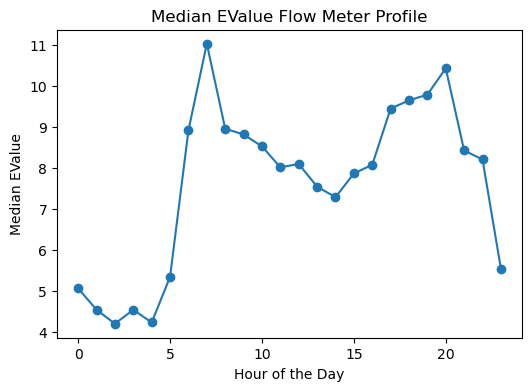

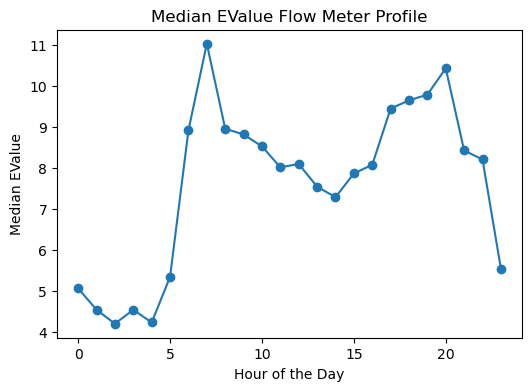

In [5]:
df_sump_filtered = df_raw_sump
df_sump_filtered = df_sump_filtered.sort_values(by="TimeGMT")
df_rainfall= processing_functions.process_rainfall_data(df_rainfall_raw)
df_hour_agg_flow_meter = processing_functions.transform_flow_meter_data(df_hour_agg_flow_meter_raw)


from Plotting_raw_data_class_2parRTK import PlotWindow


if __name__ == "__main__":
    import tkinter as tk

    root = tk.Tk()
    start_date_plot = '01-01-2023'
    end_date_plot = '01-01-2024'
    app2 = PlotWindow(root, start_date_plot, end_date_plot, df_raw_sump=df_sump_filtered, df_rainfall=df_rainfall, df_hour_agg_flow_meter=df_hour_agg_flow_meter, spill_level=100, sump_ylim=100, flow_ylim=100)
    root.mainloop()
    '''

    # Access RTK parameters and synthetic flow after the main loop ends
    R, T, K, df_synthetic_flow = app2.get_rtk_parameters_and_synthetic_flow()

    print(df_synthetic_flow.head())
    '''
    
    # Access RTK parameters and synthetic flow after the main loop ends
    R1, T1, K1, R2, T2, K2, df_synthetic_flow = app2.get_rtk_parameters_and_synthetic_flow()
    print(f"Retrieved RTK Parameters Set 1: R1 = {R1}, T1 = {T1}, K1 = {K1}")
    print(f"Retrieved RTK Parameters Set 2: R2 = {R2}, T2 = {T2}, K2 = {K2}")
    print(df_synthetic_flow.head())


In [ ]:

from processing_functions import process_spill_hours

df_spill_hours = processing_functions.process_spill_hours(df_spill_hours)


# Convert spill_hours to datetime
df_spill_hours['spill_hours'] = pd.to_datetime(df_spill_hours['spill_hours'])

# Extract year from spill_hours
df_spill_hours['year'] = df_spill_hours['spill_hours'].dt.year

# Group by year and spill_event_id and get the maximum spill_event_duration for each group
max_durations = df_spill_hours.groupby(['year', 'spill_event_id'])['spill_event_duration'].max().reset_index()

# Create a box plot for the distribution of the maximum spill_event_durations for each year
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='year', y='spill_event_duration', data=max_durations)
plt.title('Distribution of Spill Event Durations by Year')
plt.xlabel('Year')
plt.ylabel('Maximum Spill Event Duration (hours)')



# Create an overall box plot for the distribution of the maximum spill_event_durations
plt.subplot(1, 2, 2)
sns.boxplot(y=max_durations['spill_event_duration'])
plt.title('Overall Distribution of Spill Event Durations')
plt.ylabel('Maximum Spill Event Duration (hours)')



plt.gca().set_aspect(0.075)

plt.tight_layout()
plt.show()


In [ ]:



site_id = 19505
# Calculate total spill hours in each Month for each Year
total_spill_hours_per_month_year = df_spill_hours.groupby(['Year', 'Month']).size().unstack(fill_value=0)

# Create a bar chart of total spill hours in each Month with different colors for each Year
fig, ax = plt.subplots(figsize=(10, 6))

# Plot polygons for each Year with high transparency and add a line for each Year
for year in total_spill_hours_per_month_year.index:
    ax.fill_between(total_spill_hours_per_month_year.columns, 0, total_spill_hours_per_month_year.loc[year], alpha=0.25, label=str(year))
    ax.plot(total_spill_hours_per_month_year.columns, total_spill_hours_per_month_year.loc[year], marker='o')

# Set the x-axis labels to be the Months
ax.set_xticks(total_spill_hours_per_month_year.columns)
ax.set_xticklabels(total_spill_hours_per_month_year.columns)

ax.set_xlabel('Month')
ax.set_ylabel('Total Spill Hours')
ax.set_title(f'Total Spill Hours in Each Month by Year for Site ID {site_id} using sump level {DB_Addr_sump_str}')
ax.legend(title='Year')
plt.grid(True)
plt.show()

